In [107]:
import pandas as pd
import numpy as np

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')

In [110]:
train['device_details'].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [111]:
train['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [112]:
train['activity_class'] = train['purchased']+train['added_in_cart']+train['checked_out']
test['activity_class'] = test['purchased']+test['added_in_cart']+test['checked_out']

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


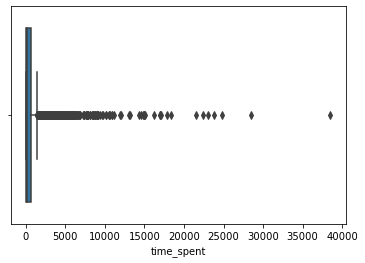

In [113]:
sns.boxplot(train['time_spent'])
plt.show()

In [114]:
Q1 = train['time_spent'].quantile(0.25) 
Q3 = train['time_spent'].quantile(0.75) 
IQR = Q3-Q1
Q3+1.5*IQR

1467.1090000000006

In [115]:
train['time_spent'].describe([0.97,0.98,0.99,1])

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
50%         98.312000
97%       4012.958560
98%       5193.649560
99%       7771.287560
100%     38494.025000
max      38494.025000
Name: time_spent, dtype: float64

###### We have a very large outlier in the data. Let us consider 99% of the data which is below 7771 seconds

In [116]:
train = train[train['time_spent']<2000]
train.shape

(4976, 10)

In [117]:
sd = np.std(train['time_spent'])
u = np.mean(train['time_spent'])

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
ss = StandardScaler()
train['time_spent'] = ss.fit_transform(np.array(train['time_spent']).reshape(-1,1))

In [120]:
def z_conv(Z,sd = sd,u = u):
    return (Z*sd)+u

In [121]:
train['date'] = train['date'].astype('datetime64')
train['dayofyear'] = train['date'].dt.dayofyear
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

test['date'] = test['date'].astype('datetime64')
test['dayofyear'] = test['date'].dt.dayofyear
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


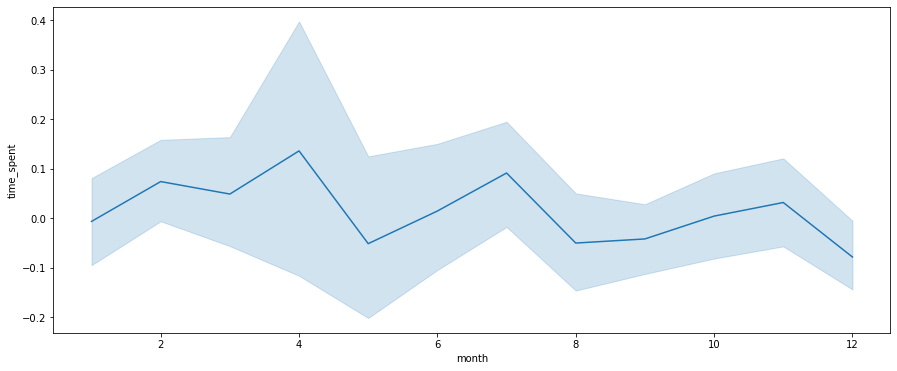

In [122]:
plt.figure(figsize = (15,6))
sns.lineplot('month','time_spent',data = train)
plt.show()

###### Post the log transformation we see a somewhat downward trend in the median time spent per month

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


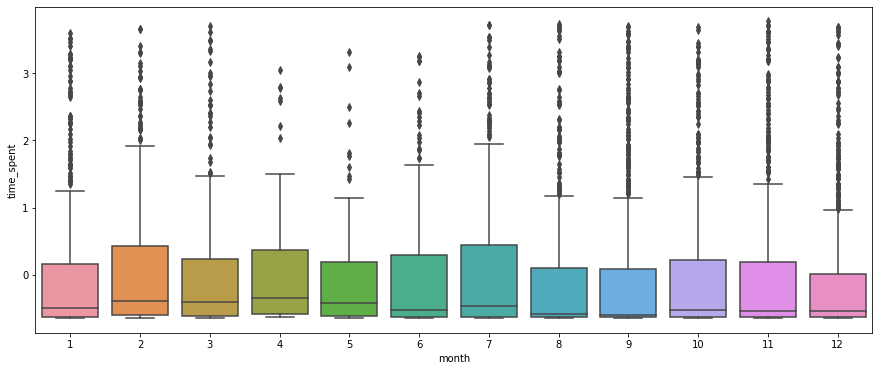

In [123]:
plt.figure(figsize = (15,6))
sns.boxplot('month','time_spent',data = train)
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


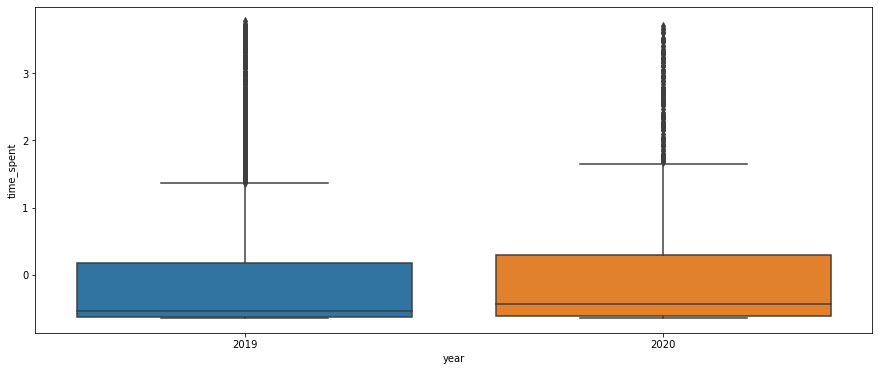

In [124]:
plt.figure(figsize = (15,6))
sns.boxplot('year','time_spent',data = train)
plt.show()

###### It seems to me that people have on median spent more time on the site in 2020

###### There does not seem to be any visible relation between year or month with the time_spent. 

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


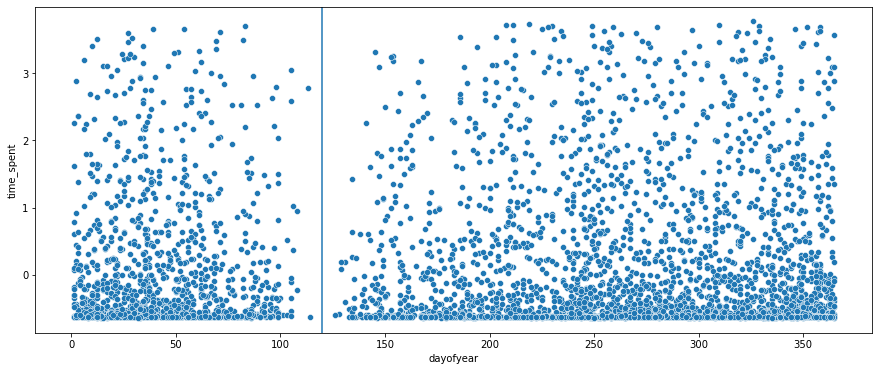

In [125]:
plt.figure(figsize = (15,6))
sns.scatterplot('dayofyear','time_spent',data = train)
plt.axvline(120)
plt.show()


###### There clearly seems to be a gap in the data

###### Let us create 2 seperate regression models for the 2 cases. For this we will have to first create a variable in both the train and test set that would determine that via which model should we make the prediction.

In [126]:
# sns.barplot(train['purchased'],train['time_spent'])

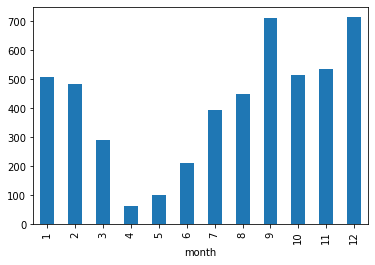

In [127]:
train.groupby('month')['month'].count().plot(kind = 'bar')
plt.show()

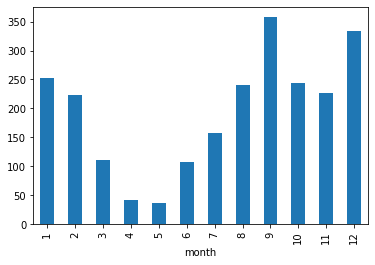

In [128]:
test.groupby('month')['month'].count().plot(kind = 'bar')
plt.show()

In [129]:
train.drop(['session_id','session_number','client_agent','date'],axis = 1,inplace = True)
test.drop(['session_id','session_number','client_agent','date'],axis = 1,inplace = True)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


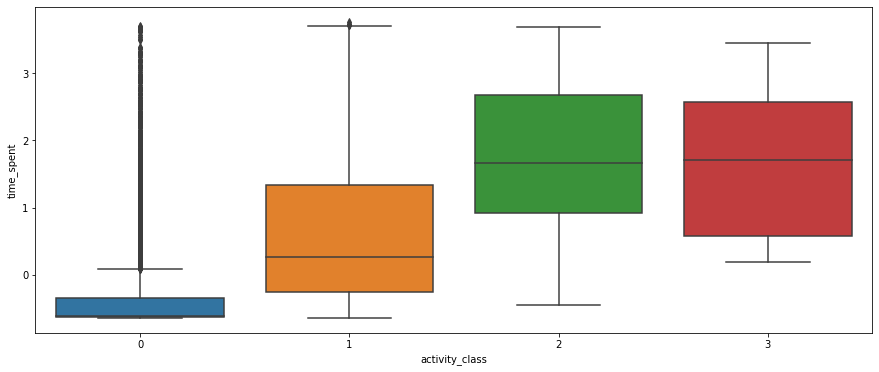

In [130]:
plt.figure(figsize = (15,6))
sns.boxplot('activity_class','time_spent',data = train)
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


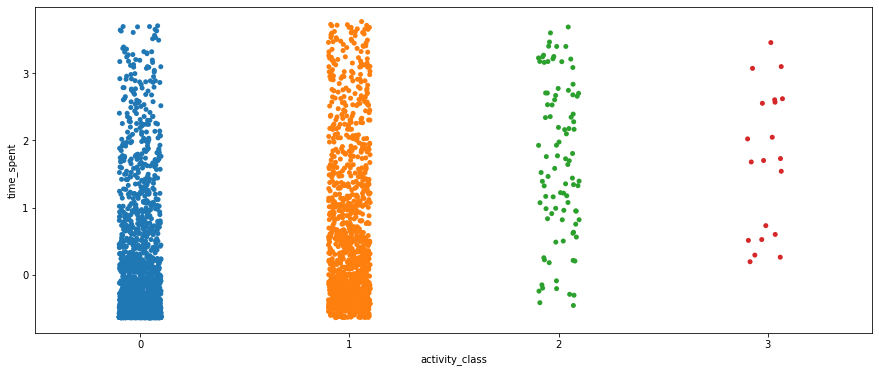

In [131]:
plt.figure(figsize = (15,6))
sns.stripplot('activity_class','time_spent',data = train)
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


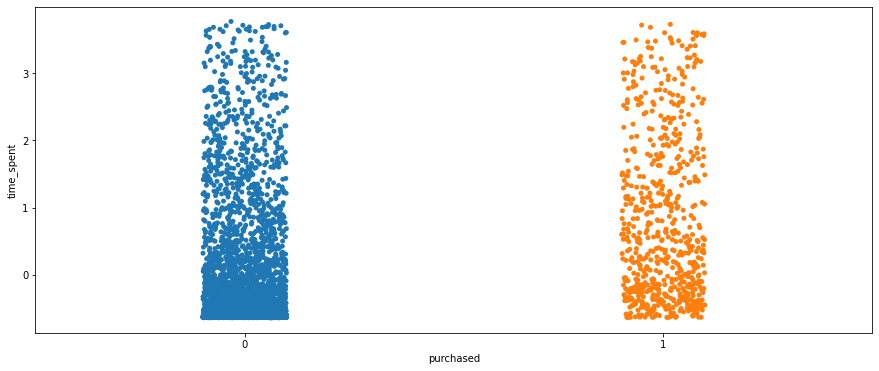

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


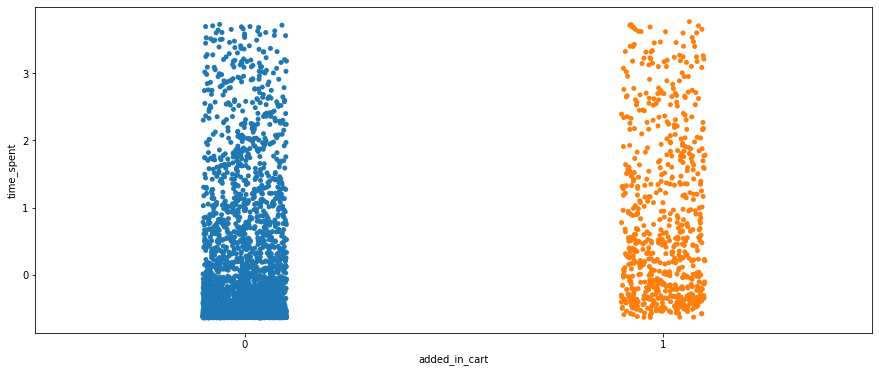

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


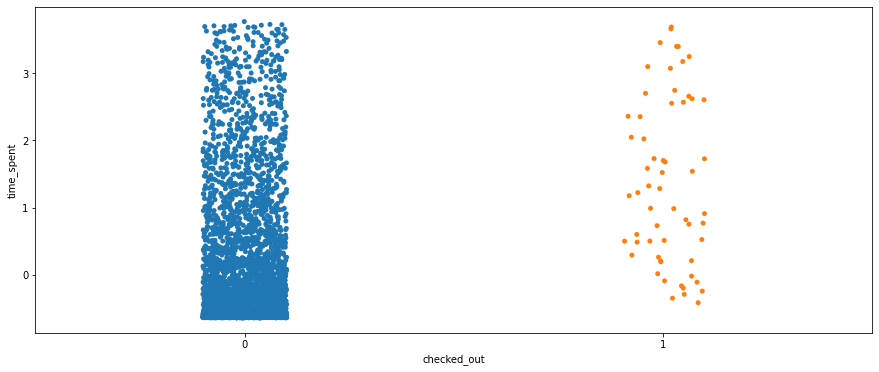

In [132]:
for i in ['purchased','added_in_cart','checked_out']:
    plt.figure(figsize = (15,6))
    sns.stripplot(i,'time_spent',data = train)
    plt.show()

###### A clear relation between our newly created activity_class column and time spent

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


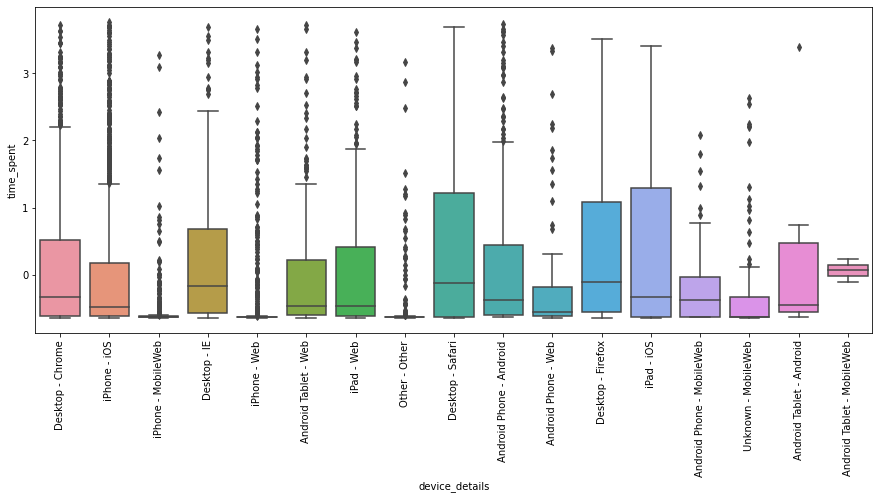

In [133]:
plt.figure(figsize = (15,6))
sns.boxplot('device_details','time_spent',data = train)
plt.xticks(rotation = 90)
plt.show()

In [134]:
z_conv(train['time_spent'])

0        236.886
1       1277.455
2         21.704
3        455.201
4       1164.877
          ...   
5424      20.601
5425    1537.666
5426      22.711
5427      20.844
5428      20.504
Name: time_spent, Length: 4976, dtype: float64

In [135]:
train['device'] = [x.split('-')[0].strip() for x in train['device_details']]
test['device'] = [x.split('-')[0].strip() for x in test['device_details']]

In [136]:
train['platform'] = [x.split('-')[1].strip() for x in train['device_details']]
test['platform'] = [x.split('-')[1].strip() for x in test['device_details']]

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


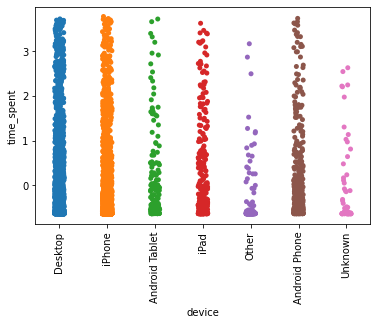

In [137]:
sns.stripplot('device','time_spent',data = train)
plt.xticks(rotation = 90)
plt.show()

In [138]:
test.drop('device_details',axis = 1,inplace = True)
train.drop('device_details',axis = 1,inplace = True)

In [139]:
train.head()

,purchased,added_in_cart,checked_out,time_spent,activity_class,dayofyear,year,month,device,platform
0,1,0,0,-0.148973,1,22,2020,1,Desktop,Chrome
1,1,0,0,2.167668,1,58,2020,2,iPhone,iOS
2,0,0,0,-0.628037,0,213,2019,8,iPhone,MobileWeb
3,0,1,0,0.337066,1,364,2019,12,Desktop,IE
4,0,0,0,1.917033,0,253,2019,9,iPhone,Web


C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


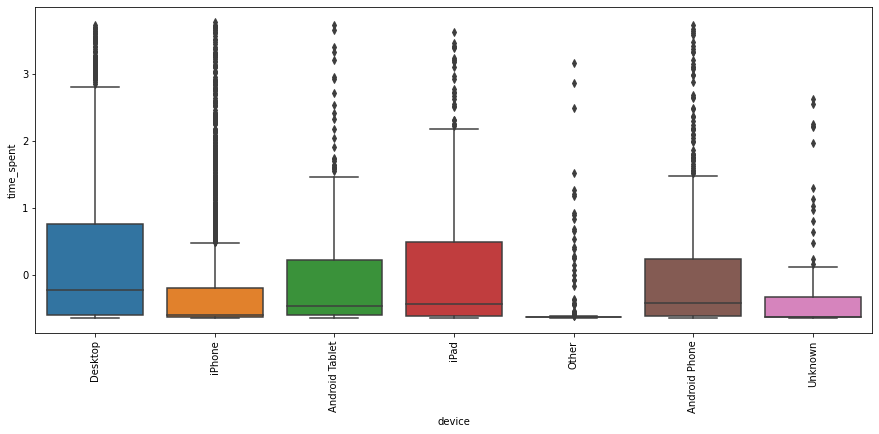

In [140]:
plt.figure(figsize = (15,6))
sns.boxplot('device','time_spent',data = train)
plt.xticks(rotation = 90)
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


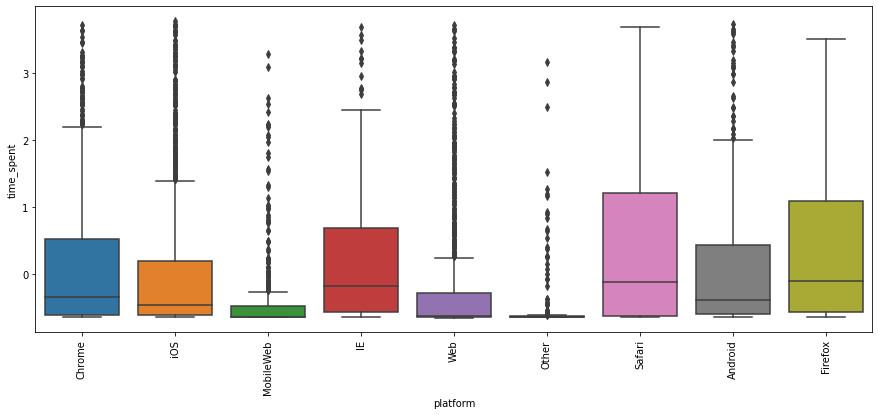

In [141]:
plt.figure(figsize = (15,6))
sns.boxplot('platform','time_spent',data = train)
plt.xticks(rotation = 90)
plt.show()

###### Both categorical variables seem to show some variation but mostly all these variables are spanning over entire y-axis. Relation is not as clear yet.

###### Converting categorical data into numerical. We will use one hot encoding here since number of classes are within acceptable limit and the categorical variables are nominal and not ordinal. So they should not carry any weights.

In [142]:
device = pd.get_dummies(train['device'])
platform = pd.get_dummies(train['platform'])

tdevice = pd.get_dummies(test['device'])
tplatform = pd.get_dummies(test['platform'])

In [143]:
device.columns

Index(['Android Phone', 'Android Tablet', 'Desktop', 'Other', 'Unknown',
       'iPad', 'iPhone'],
      dtype='object')

In [144]:
platform.columns

Index(['Android', 'Chrome', 'Firefox', 'IE', 'MobileWeb', 'Other', 'Safari',
       'Web', 'iOS'],
      dtype='object')

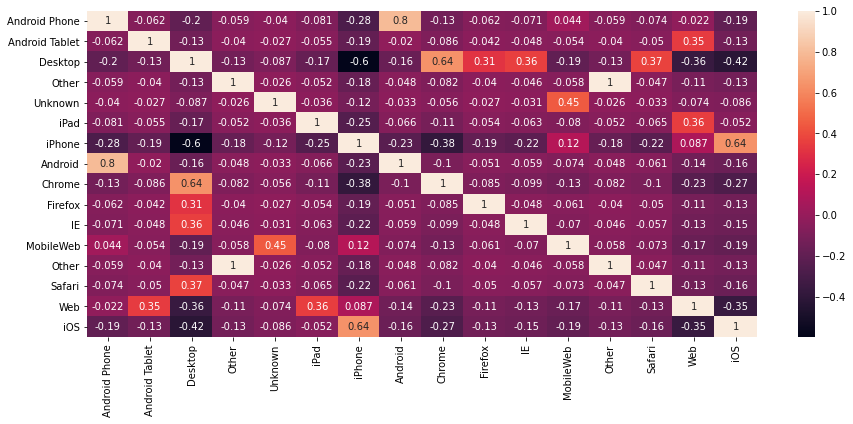

In [145]:
plt.figure(figsize=(15,6))
dp = pd.concat((device,platform),axis = 1)
tdp = pd.concat((tdevice,tplatform),axis = 1)
sns.heatmap(pd.concat((device,platform),axis = 1).corr(),annot = True)
plt.show()

###### Observations 

* 2 other columns are present. One must be dropped.
* Don't require both android phone and android. 
* Drop all the browsers that are correlated with desktop
* We will also drop the "Other" column since it carries lot of outliers and is less in number
* We can also drop the Unknown column since it is corelated with mobileweb and also has less number of records.

In [146]:
dp.sum().sort_values(ascending = False)

iPhone            2277
Desktop           1481
iOS               1452
Web               1164
Chrome             741
Android Phone      418
MobileWeb          408
iPad               331
Android            289
Safari             279
IE                 262
Android Tablet     200
Firefox            199
Other              182
Other              182
Unknown             87
dtype: int64

In [147]:
dp = dp.drop(['IE','Safari','Chrome','Firefox','iPad','Android Tablet','iOS','MobileWeb','Android','Other'],axis = 1)
tdp = tdp.drop(['IE','Safari','Chrome','Firefox','iPad','Android Tablet','iOS','MobileWeb','Android','Other'],axis = 1)


In [148]:
train = pd.concat((train,dp),axis = 1)
test = pd.concat((test,tdp),axis = 1)

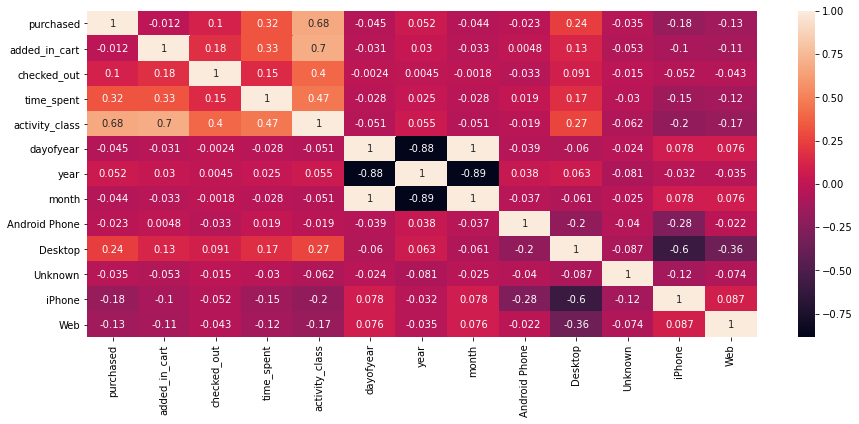

In [149]:
plt.figure(figsize = (15,6))
sns.heatmap(train.corr(),annot = True)
plt.show()

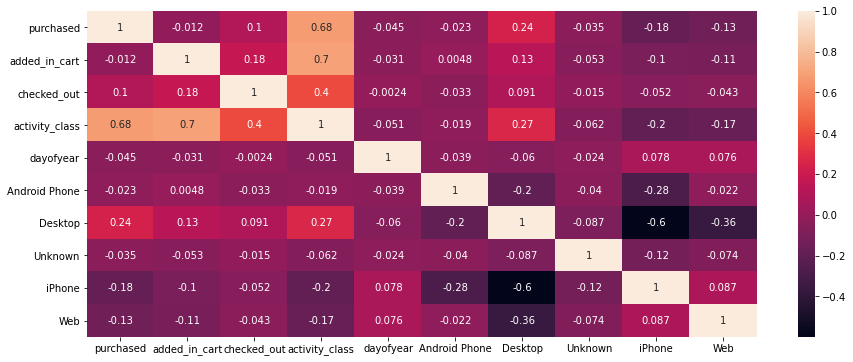

In [150]:
plt.figure(figsize = (15,6))
sns.heatmap(train.drop(['month','year','time_spent'],axis = 1).corr(),annot = True)
plt.show()

In [151]:
train.drop(['device','platform'],axis = 1,inplace = True)
test.drop(['device','platform'],axis = 1,inplace = True)

In [152]:
train.drop(['month','year'],axis = 1,inplace = True)
test.drop(['month','year'],axis = 1,inplace = True)

In [153]:
train.shape,test.shape

((4976, 11), (2327, 10))

In [154]:
# np.exp(y_pred)-np.exp(y_test)

In [155]:
train['dayofyear'] = ss.fit_transform(np.array(train['dayofyear']).reshape(-1,1))
test['dayofyear'] = ss.fit_transform(np.array(test['dayofyear']).reshape(-1,1))

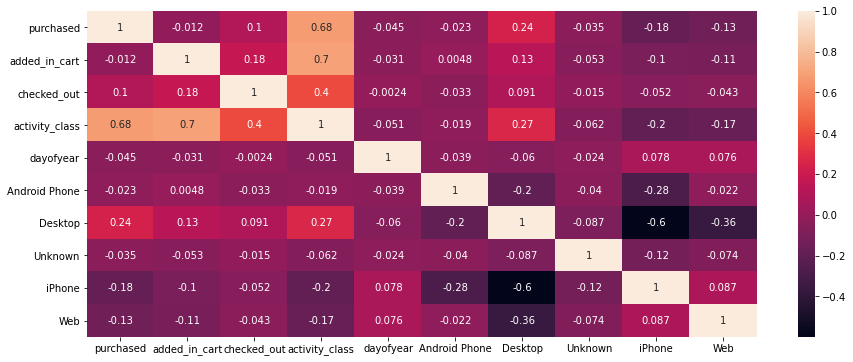

In [156]:
plt.figure(figsize = (15,6))
sns.heatmap(train.drop(['time_spent'],axis = 1).corr(),annot = True)
plt.show()

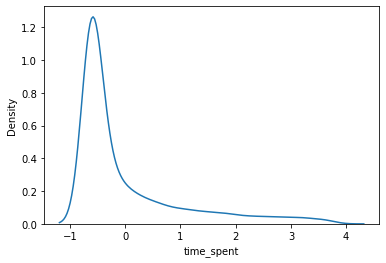

In [157]:
sns.kdeplot('time_spent',data = train)

In [158]:
train.shape,test.shape

((4976, 11), (2327, 10))

In [159]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [160]:
X = train.drop('time_spent',axis = 1)
y = train['time_spent']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 6)

# LinearRegression

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


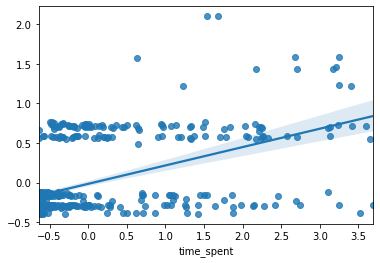

(1.5972198794055352, 0.2596269981760868)

In [161]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
sns.regplot(y_test,y_pred)
plt.show()
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),lr.score(x_test,y_test)

# Ridge

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.5945615757093357, 0.2603422166059641)

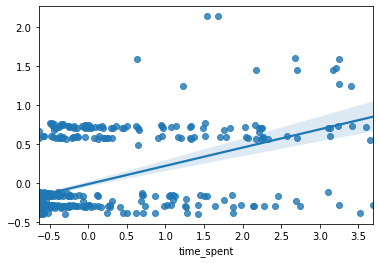

In [162]:
lr = Ridge()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred = lr.predict(x_test)

sns.regplot(y_test,y_pred)
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),lr.score(x_test,y_test)

# Lasso

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.6206418670491243, 0.26231908557568384)

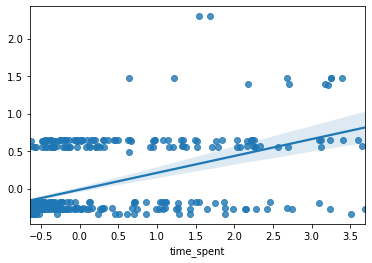

In [163]:
lr = Lasso(alpha=0.01)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred = lr.predict(x_test)

sns.regplot(y_test,y_pred)
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),lr.score(x_test,y_test)

# ElasticNet

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.6269535225355634, 0.26047385429393366)

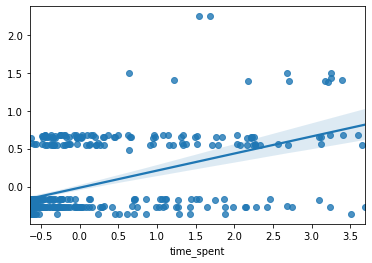

In [164]:
lr = ElasticNet(alpha=0.01)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred = lr.predict(x_test)

sns.regplot(y_test,y_pred)
np.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(y_pred))),lr.score(x_test,y_test)

# Decision Trees

In [165]:
from sklearn.tree import DecisionTreeRegressor

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.615929779154741, 0.05309529884401798)

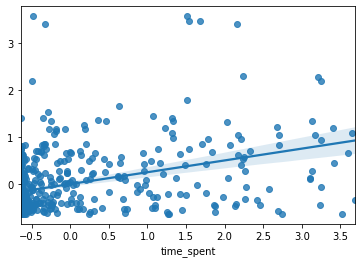

In [166]:
dt = DecisionTreeRegressor(criterion = 'mse',min_samples_split =25)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
y_pred = dt.predict(x_test)

sns.regplot(y_test,y_pred)
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),dt.score(x_test,y_test)

# RandomForest Regressor

In [167]:
from sklearn.metrics import make_scorer

In [168]:
def scoring(y_test,y_pred):
    return np.sqrt(mean_squared_log_error(np.exp(y_test),abs(np.exp(y_pred))))

In [169]:
# msle = make_scorer(msle,greater_is_better = False)

In [170]:
p = {
    "n_estimators" : [130,135,140,145,150],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : [11,12,13],
    'min_samples_split': [11,12,13],
    'max_features' : ['auto','log2']
}

In [171]:
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(RandomForestRegressor(),p,n_jobs = -1,cv = 5, verbose = 3)
# grid_search.fit(x_train,y_train)

In [172]:
# grid_search.best_params_

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.2808155446113199, 0.05309529884401798)

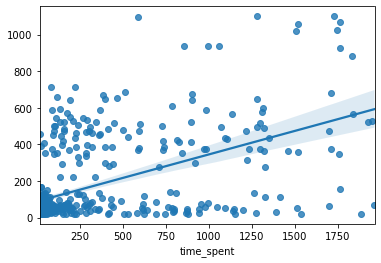

In [173]:
from sklearn.ensemble import RandomForestRegressor
rand_clf = RandomForestRegressor(n_estimators = 100,criterion = 'mae',min_samples_split =35,min_samples_leaf=20,random_state = 6)
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)
y_pred = rand_clf.predict(x_test)

sns.regplot(z_conv(y_test),z_conv(y_pred))
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),dt.score(x_test,y_test)


C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 1500.0)

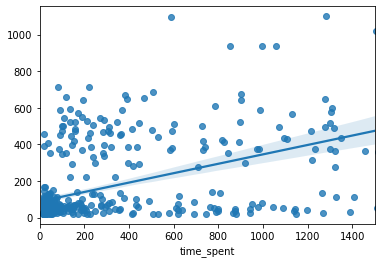

In [174]:
sns.regplot(z_conv(y_test),z_conv(y_pred))
plt.xlim(0,1500)

In [175]:
# z_conv(y_test)

In [176]:
from sklearn.ensemble import BaggingRegressor

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.2712464004355737, 0.05309529884401798)

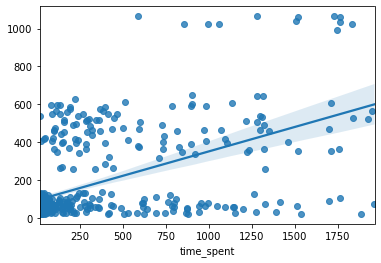

In [178]:
rand_bag = BaggingRegressor(rand_clf,n_estimators = 5)
rand_bag.fit(x_train,y_train)
rand_bag.score(x_test,y_test)
y_pred = rand_bag.predict(x_test)

sns.regplot(z_conv(y_test),z_conv(y_pred))
np.sqrt(mean_squared_log_error(z_conv(y_test),z_conv(y_pred))),dt.score(x_test,y_test)


In [ ]:
# predictions = rand_bag.predict(test)
# pred = pd.DataFrame(z_conv(predictions),columns = ['time_spent'])

In [180]:
z_conv(y_test)

1900    172.532
1093     20.701
5289     47.968
4355    127.931
2764    382.924
         ...   
3440    151.419
3842    153.840
1994     20.451
3203    901.760
2593     22.271
Name: time_spent, Length: 498, dtype: float64

In [196]:
d = z_conv(y_pred)-z_conv(y_test)

In [207]:
d[(d>-900)&(d<900)]

1900    388.553762
1093      3.840840
5289     -0.928415
4355    -46.093099
2764    180.240253
           ...    
3440   -127.889885
3842    247.478194
1994     56.187779
3203   -298.295278
2593     31.959596
Name: time_spent, Length: 467, dtype: float64

In [221]:
pred = rand_bag.predict(test)

In [226]:
pd.DataFrame(z_conv(pred),columns = ['time_spent']).to_csv('Submissions/last.csv',index = False)